In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 

In [2]:
from subprocess import check_output
import matplotlib.pyplot as plt

In [3]:
aisles = pd.read_csv('/Users/aarathisrinivasnadathur/Desktop/Docs/aisles.csv')

departments = pd.read_csv('/Users/aarathisrinivasnadathur/Desktop/Docs/departments.csv')

order_products_prior = pd.read_csv("/Users/aarathisrinivasnadathur/Desktop/Docs/order_products__prior.csv")

order_products_train = pd.read_csv("/Users/aarathisrinivasnadathur/Desktop/Docs/order_products__train.csv")

orders = pd.read_csv("/Users/aarathisrinivasnadathur/Desktop/Docs/orders.csv")

products = pd.read_csv("/Users/aarathisrinivasnadathur/Desktop/Docs/products.csv")

sample_submission = pd.read_csv("/Users/aarathisrinivasnadathur/Desktop/Docs/sample_submission.csv")


In [4]:
aisles.shape

(134, 2)

In [5]:
departments.shape

(21, 2)

In [6]:
order_products_prior.shape

(32434489, 4)

In [7]:
order_products_train.shape

(1384617, 4)

In [8]:
orders.shape

(3421083, 7)

In [9]:
products.shape

(49688, 4)

In [10]:
sample_submission.shape

(75000, 2)

In [11]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [13]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [14]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [15]:
orders.isnull()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3421078,False,False,False,False,False,False,False
3421079,False,False,False,False,False,False,False
3421080,False,False,False,False,False,False,False
3421081,False,False,False,False,False,False,False


In [16]:
orders = orders.fillna(-1)
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,-1.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


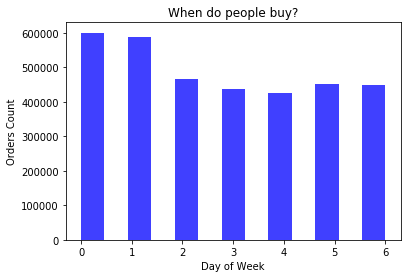

In [17]:
orders.order_dow.unique()

n, bins, patches = plt.hist(orders.order_dow, 13, facecolor="blue", alpha=.75, align='mid')
plt.xlabel("Day of Week")
plt.ylabel("Orders Count")
plt.title("When do people buy?")
plt.show()

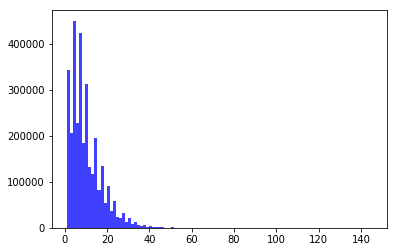

In [18]:
order_products_cart_prior = order_products_prior.groupby('order_id')
n_items = order_products_cart_prior['add_to_cart_order'].max()
n, bins, patches = plt.hist(n_items, 100, facecolor="blue", alpha=.75, align='mid')
plt.show()

In [19]:
order_products_cart_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434479,3421083,7854,1,0
32434480,3421083,45309,2,0
32434481,3421083,21162,3,0
32434482,3421083,18176,4,1


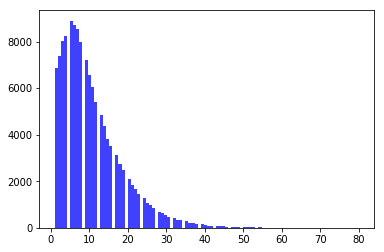

In [20]:
order_products_cart_prior = order_products_train.groupby('order_id')
n_items_train = order_products_cart_prior['add_to_cart_order'].max()
n, bins, patches = plt.hist(n_items_train, 100, facecolor="blue", alpha=.75, align='mid')
plt.show()

,product_id,count,product_name,aisle_id,department_id
0,24852,18726,Banana,24,4
1,13176,15480,Bag of Organic Bananas,24,4
2,21137,10894,Organic Strawberries,24,4
3,21903,9784,Organic Baby Spinach,123,4
4,47626,8135,Large Lemon,24,4
5,47766,7409,Organic Avocado,24,4
6,47209,7293,Organic Hass Avocado,24,4
7,16797,6494,Strawberries,24,4
8,26209,6033,Limes,24,4
9,27966,5546,Organic Raspberries,123,4


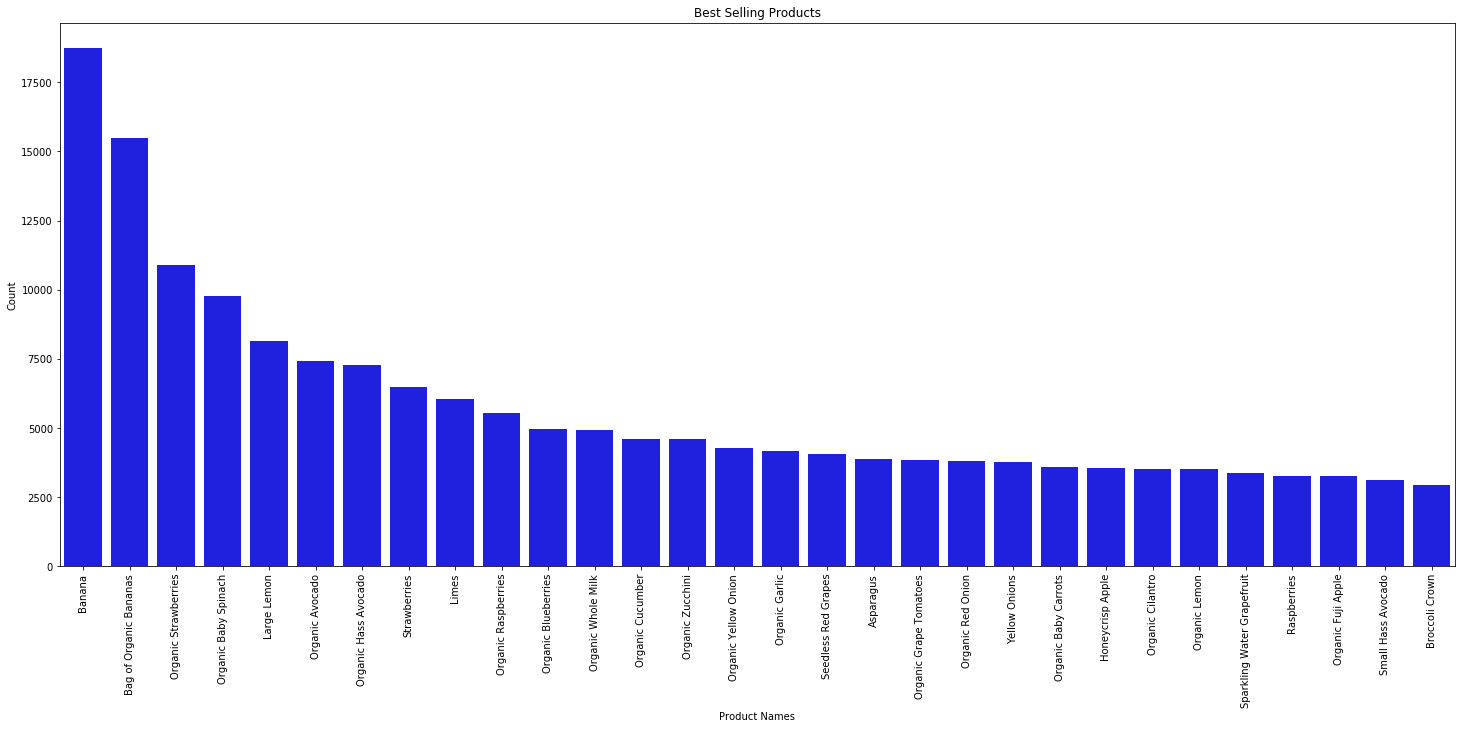

In [21]:
import seaborn as sns
productsCount = order_products_train["product_id"].value_counts().to_frame()
productsCount["count"] = productsCount.product_id
productsCount["product_id"] = productsCount.index
mergedData = pd.merge(productsCount,products,how="left",on="product_id").sort_values(by="count",ascending=False)

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.barplot(data=mergedData.head(30),x="product_name",y="count",ax=ax,orient="v",color="blue")
ax.set(xlabel='Product Names',ylabel="Count",title="Best Selling Products")
plt.xticks(rotation=90)

mergedData.head(10)

,product_id,count,reordered_count,reordered_ratio,product_name,aisle_id,department_id
0,43334,1,1.0,1.0,Classics Hot Cocoa Mix Variety Pack,90,7
1,24324,1,1.0,1.0,Vitamin B-12 1000 mcg,47,11
2,3171,2,2.0,1.0,Beef Raviolis Pasta in Meat Sauce,59,15
3,20611,2,2.0,1.0,3 Ply Wheat Straw Bath Tissue,54,17
4,47221,2,2.0,1.0,Premium Roast Decaf K Cup,26,7
5,98,2,2.0,1.0,2% Yellow American Cheese,2,16
6,28558,2,2.0,1.0,Organic Irish Breakfast Black Tea,94,7
7,27354,2,2.0,1.0,Authentic Asia Shrimp Wonton Soup With Noodles,38,1
8,9361,2,2.0,1.0,Healthy Indulgence Salmon & Chicken Cat Food,41,8
9,26851,2,2.0,1.0,Chew-Lotta Long Lasting Chewbone Dog Snacks,40,8


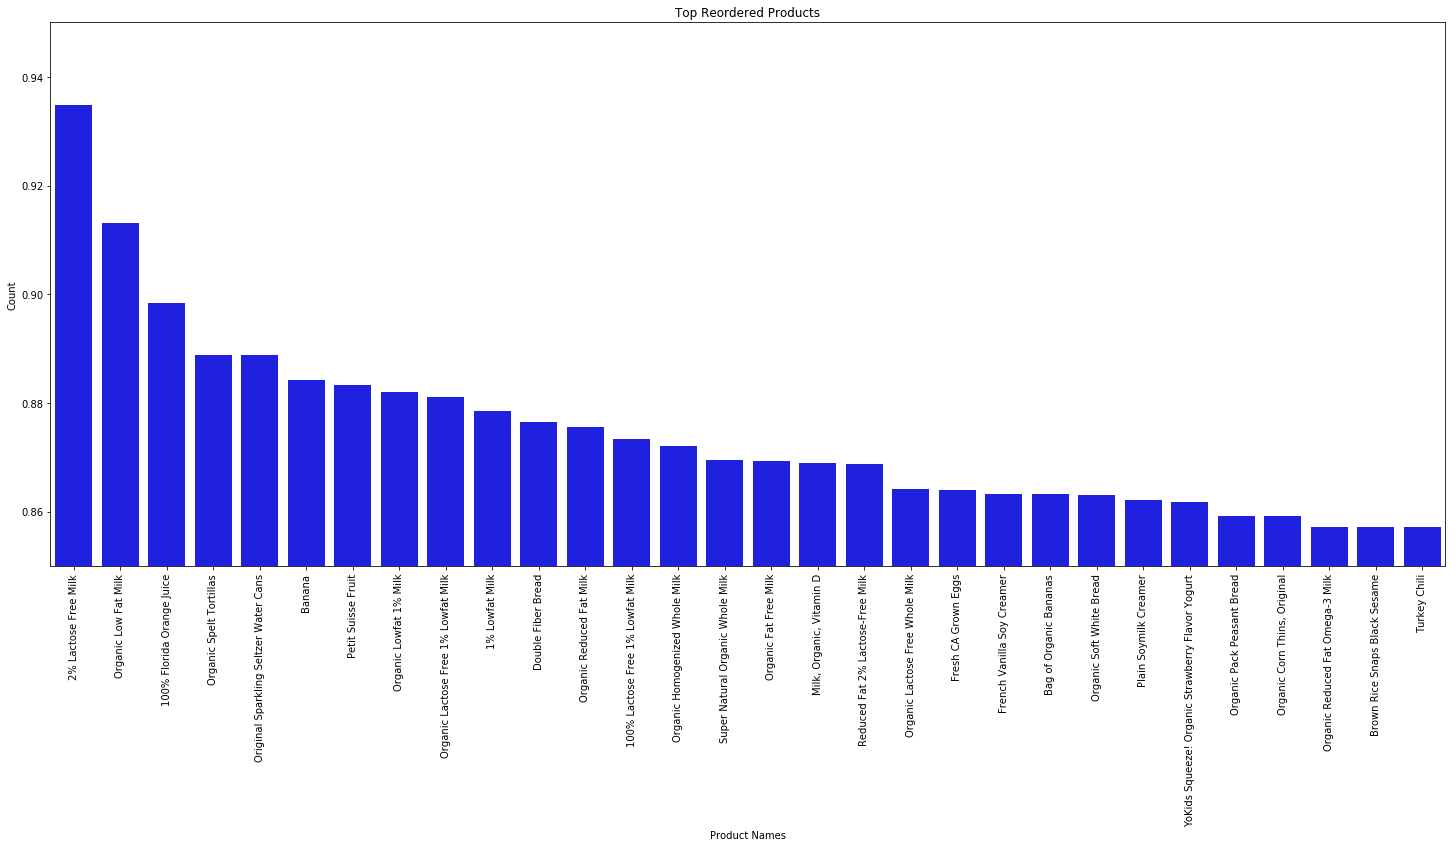

In [22]:
productsCountReordered = order_products_train [order_products_train ["reordered"]==1]["product_id"].value_counts().to_frame()
productsCountReordered["reordered_count"] = productsCountReordered.product_id
productsCountReordered["product_id"] = productsCountReordered.index
productCountReorderedMerged = pd.merge(productsCount,productsCountReordered,how="left",on="product_id").sort_values(by="count",ascending=False)
productCountReorderedMerged["reordered_ratio"] = productCountReorderedMerged["reordered_count"]/productCountReorderedMerged["count"]
productCountReorderedMerged.sort_values(by="reordered_ratio",ascending=False,inplace=True)
productMerged = pd.merge(productCountReorderedMerged,products,how="left",on="product_id")

fig,ax = plt.subplots()
fig.set_size_inches(25,10)
sns.barplot(data=productMerged[productMerged["count"]>40].head(30),x="product_name",y="reordered_ratio",color="blue",ax=ax,orient="v")
ax.set(xlabel='Product Names',ylabel="Count",title="Top Reordered Products")
ax.set_ylim(0.85,.95)
plt.xticks(rotation=90)

productMerged.head(10)

In [23]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [24]:
sample_submission.head()


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [25]:
tmp = order_products_prior.groupby('product_id')['add_to_cart_order'].count().to_frame()
tmp.head()

,add_to_cart_order
product_id,
1,1852
2,90
3,277
4,329
5,15


In [26]:
merged = pd.merge(products, pd.DataFrame(tmp, columns=['add_to_cart_order']), 
                  left_on='product_id', right_index=True)
merged.head()

,product_id,product_name,aisle_id,department_id,add_to_cart_order
0,1,Chocolate Sandwich Cookies,61,19,1852
1,2,All-Seasons Salt,104,13,90
2,3,Robust Golden Unsweetened Oolong Tea,94,7,277
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,329
4,5,Green Chile Anytime Sauce,5,13,15


In [27]:
merged.sort_values('add_to_cart_order', ascending=False)

,product_id,product_name,aisle_id,department_id,add_to_cart_order
24851,24852,Banana,24,4,472565
13175,13176,Bag of Organic Bananas,24,4,379450
21136,21137,Organic Strawberries,24,4,264683
21902,21903,Organic Baby Spinach,123,4,241921
47208,47209,Organic Hass Avocado,24,4,213584
...,...,...,...,...,...
45892,45893,Florentine Spinach & Cheese Pasta Sauce,9,9,1
13396,13397,"Molasses, Bead",66,6,1
30450,30451,"Pasta & Enchilada Sauce, Organic, 7 Veggie",9,9,1
42463,42464,Organic Aleppo Pepper,104,13,1


In [28]:
reordered_products_train = pd.DataFrame({'count' : order_products_train.groupby( ['reordered'] ).size()}).reset_index()
newcol = reordered_products_train['count']/reordered_products_train['count'].sum()
reordered_products_train = reordered_products_train.assign(proportion = newcol )
reordered_products_train

,reordered,count,proportion
0,0,555793,0.401406
1,1,828824,0.598594


In [29]:
most_reordered_product = pd.DataFrame({'product_id':order_products_train['product_id'],
                                     'proportion':order_products_train.groupby('product_id')['reordered'].mean(),
                                      'n': order_products_train.groupby('product_id')['reordered'].count()})
merged_reordered = pd.merge(products, pd.DataFrame(most_reordered_product, columns=['n', 'product_id', 'proportion']), 
                  left_on='product_id', right_index=True).reset_index()
merged_reordered.head()
merged_reordered = merged_reordered[merged_reordered['n'] > 40.0]
merged_reordered.sort_values('proportion', ascending=False).head()

,index,product_id,product_id_x,product_name,aisle_id,department_id,n,product_id_y,proportion
1728,1728,1729,1729,2% Lactose Free Milk,84,16,92.0,34,0.934783
20939,20939,20940,20940,Organic Low Fat Milk,84,16,368.0,43352,0.913043
12192,12192,12193,12193,100% Florida Orange Juice,98,7,59.0,29327,0.898305
31763,31763,31764,31764,Original Sparkling Seltzer Water Cans,115,7,45.0,24009,0.888889
21037,21037,21038,21038,Organic Spelt Tortillas,128,3,81.0,1934,0.888889


In [30]:
product_by_id_order = pd.DataFrame({'count':order_products_train.groupby(['product_id', 'add_to_cart_order']).size()})
new_col = product_by_id_order['count']/product_by_id_order['count'].sum()
product_by_id_order = product_by_id_order.assign(pct=new_col)
product_by_id_order = product_by_id_order.reset_index()
product_by_id_order.head()

,product_id,add_to_cart_order,count,pct
0,1,1,12,8.666657e-06
1,1,2,10,7.222214e-06
2,1,3,14,1.011110e-05
3,1,4,4,2.888886e-06
4,1,5,1,7.222214e-07


In [31]:
merged_product_reordered = pd.merge(products, product_by_id_order,
                                   on='product_id', how="left")
merged_product_reordered.reset_index()
merged_product_reordered.head()
merged_product_reordered = merged_product_reordered[merged_product_reordered['add_to_cart_order'] == 1]
merged_product_reordered = merged_product_reordered[merged_product_reordered['count'] > 10]
merged_product_reordered.sort_values('pct', ascending=False, axis=0)

,product_id,product_name,aisle_id,department_id,add_to_cart_order,count,pct
163163,24852,Banana,24,4,1.0,4605.0,0.003326
86334,13176,Bag of Organic Bananas,24,4,1.0,3889.0,0.002809
182621,27845,Organic Whole Milk,84,16,1.0,1144.0,0.000826
314121,47766,Organic Avocado,24,4,1.0,995.0,0.000719
138767,21137,Organic Strawberries,24,4,1.0,900.0,0.000650
...,...,...,...,...,...,...,...
139351,21227,Smart Dogs Veggie Hot Dogs,14,20,1.0,11.0,0.000008
245835,37307,Organic Asian Chopped Salad Kit,100,21,1.0,11.0,0.000008
64238,9779,Shepherd's Pie,38,1,1.0,11.0,0.000008
143133,21777,Maple Quinoa Cluster With Chia Seeds,57,14,1.0,11.0,0.000008


In [32]:
order_time_join = pd.merge(order_products_train, orders, on="order_id")
order_time_join.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,49302,1,1,112108,train,4,4,10,9.0
1,1,11109,2,1,112108,train,4,4,10,9.0
2,1,10246,3,0,112108,train,4,4,10,9.0
3,1,49683,4,0,112108,train,4,4,10,9.0
4,1,43633,5,1,112108,train,4,4,10,9.0


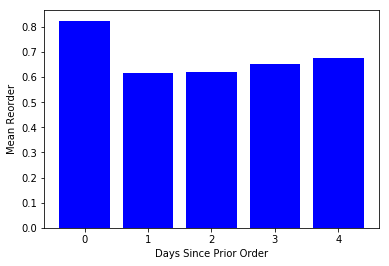

In [33]:
order_time_groupby_reorder = pd.DataFrame({'mean_reorder': order_time_join.groupby(['days_since_prior_order'])['reordered'].mean()})
order_time_groupby_reorder = order_time_groupby_reorder.reset_index().head()
plt.ylabel('Mean Reorder')
plt.xlabel('Days Since Prior Order')
plt.bar(order_time_groupby_reorder['days_since_prior_order'], 
        order_time_groupby_reorder['mean_reorder'], color='blue')
plt.show()

In [34]:
product_by_reordered = pd.DataFrame({'mean_reorder': order_products_train.groupby(['product_id'])['reordered'].mean(),
                                    'count': order_products_train.groupby(['product_id'])['order_id'].count()})
product_by_reordered = product_by_reordered.reset_index()

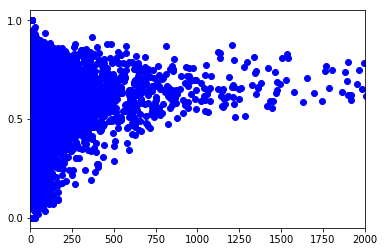

In [35]:
plt.xlim([0,2000])
plt.yticks([0,0.5,1.0,1.5])
plt.plot(product_by_reordered['count'],product_by_reordered['mean_reorder'] , 'bo')
plt.show()

In [36]:
print("The ratio of products reordered in order_products_prior: {}".format(order_products_prior["reordered"].sum()/order_products_prior.shape[0]))
print("The ratio of products reordered in order_products_train: {}".format(order_products_train["reordered"].sum()/order_products_train.shape[0]))

The ratio of products reordered in order_products_prior: 0.5896974667922161
The ratio of products reordered in order_products_train: 0.5985944127509629


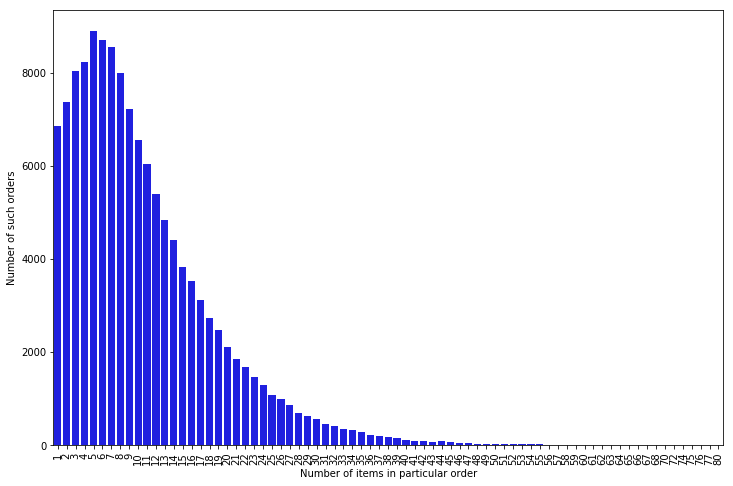

In [37]:
import seaborn as sns
count = order_products_train.groupby("order_id")["add_to_cart_order"].aggregate("count").reset_index()
count = count["add_to_cart_order"].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(count.index,count.values, color='blue')
plt.xlabel("Number of items in particular order")
plt.ylabel("Number of such orders")
plt.xticks(rotation="vertical")
plt.show()

In [38]:
order_products_prior = pd.merge(order_products_prior,products, on = 'product_id', how='left')
order_products_prior = pd.merge(order_products_prior,departments, on = "department_id", how="left")
order_products_prior = pd.merge(order_products_prior, aisles, on='aisle_id', how='left')

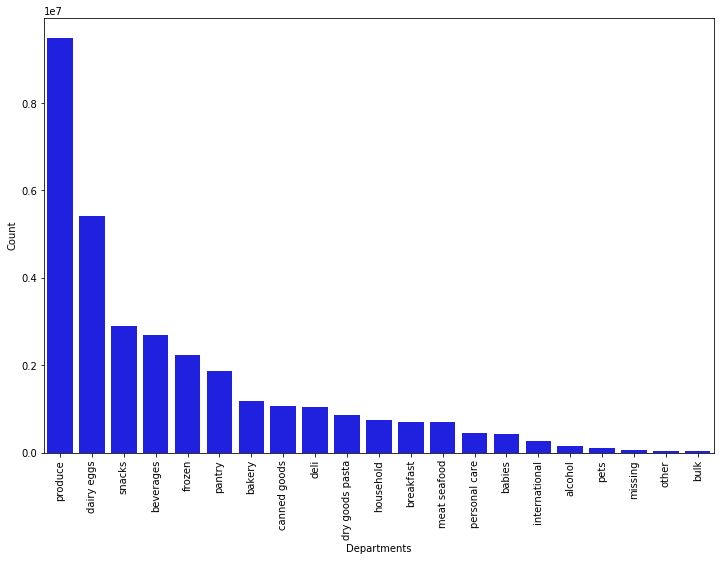

In [39]:
count = order_products_prior["department"].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(count.index,count.values,color='blue')
plt.xlabel("Departments")
plt.ylabel("Count")
plt.xticks(rotation="vertical")
plt.show()

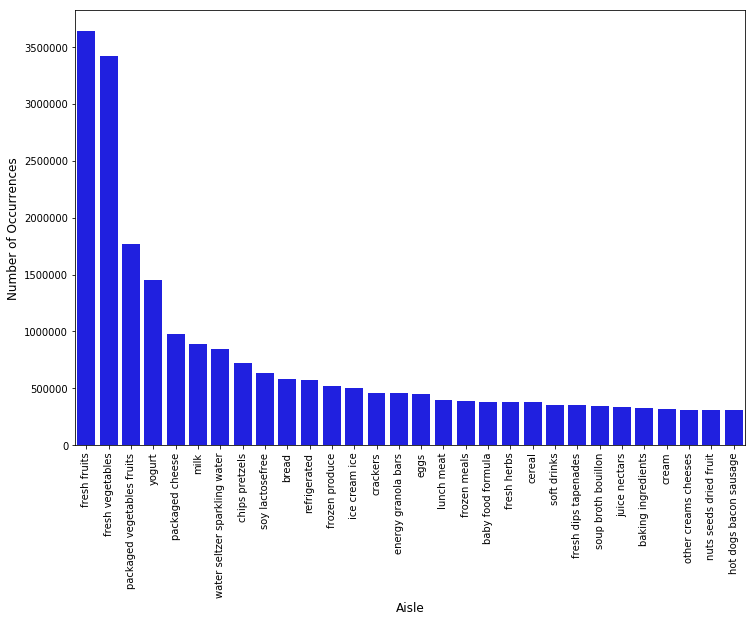

In [40]:
count = order_products_prior['aisle'].value_counts().head(30)
plt.figure(figsize=(12,8))
sns.barplot(count.index, count.values, color='blue')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

  department  reordered
0    alcohol   0.569924
1     babies   0.578971
2     bakery   0.628141
3  beverages   0.653460
4  breakfast   0.560922


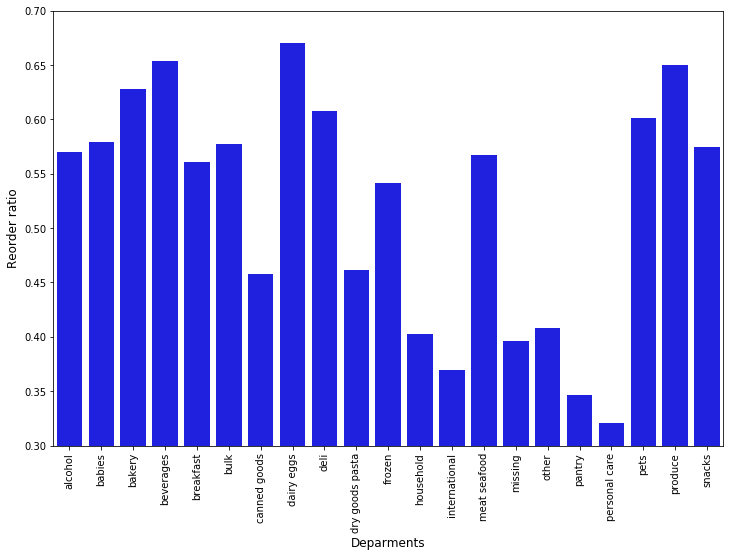

In [41]:
count = order_products_prior.groupby("department")["reordered"].aggregate("mean").reset_index()

print(count.head())
plt.figure(figsize=(12,8))
sns.barplot(count["department"].values, count["reordered"].values, color='blue')
plt.xticks(rotation = "vertical")
plt.xlabel("Deparments", fontsize=12)
plt.ylabel("Reorder ratio", fontsize=12)
plt.ylim(0.3,0.7)
plt.show()

   order_dow  reordered
0          0   0.609624
1          1   0.598977
2          2   0.588365
3          3   0.586724
4          4   0.594632


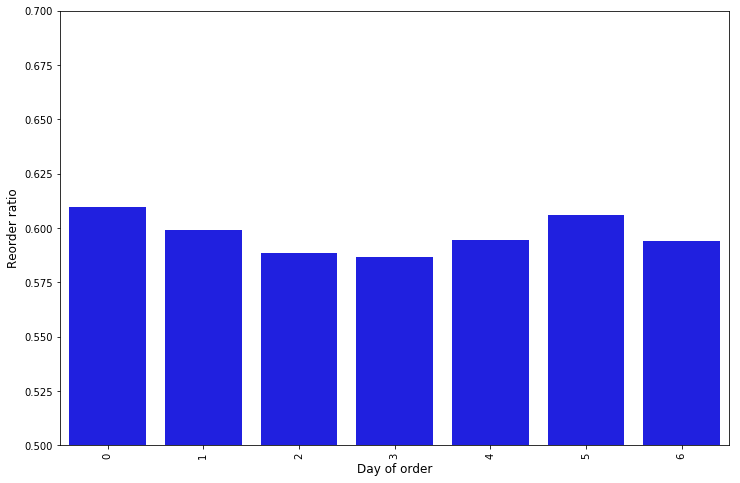

In [42]:
order_products_train = pd.merge(order_products_train, orders, on = 'order_id', how= 'left')
count = order_products_train.groupby("order_dow")["reordered"].aggregate("mean").reset_index()

print(count.head())
plt.figure(figsize=(12,8))
sns.barplot(count["order_dow"].values, count["reordered"].values, color='blue')
plt.xticks(rotation = "vertical")
plt.xlabel("Day of order", fontsize=12)
plt.ylabel("Reorder ratio", fontsize=12)
plt.ylim(0.5,0.7)
plt.show()

   order_hour_of_day  reordered
0                  0   0.571177
1                  1   0.579453
2                  2   0.579665
3                  3   0.581624
4                  4   0.598108


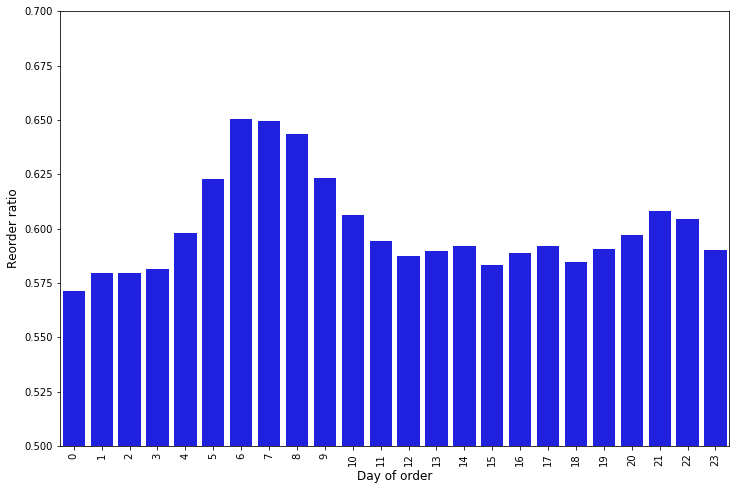

In [43]:
count = order_products_train.groupby("order_hour_of_day")["reordered"].aggregate("mean").reset_index()

print(count.head())
plt.figure(figsize=(12,8))
sns.barplot(count["order_hour_of_day"].values, count["reordered"].values, color='blue')
plt.xticks(rotation = "vertical")
plt.xlabel("Day of order", fontsize=12)
plt.ylabel("Reorder ratio", fontsize=12)
plt.ylim(0.5,0.7)
plt.show()

In [44]:
order_groupby_orderid = pd.DataFrame({'order_id': order_products_prior.order_id,
                                      'mean_reorder': order_products_prior.groupby(['order_id'])['reordered'].mean(),
                                     'product_id':order_products_prior.product_id
                                     })
order_groupby_orderid.dtypes


order_id          int64
mean_reorder    float64
product_id        int64
dtype: object

In [45]:
order_groupby_orderid.head()

,order_id,mean_reorder,product_id
0,2,NaN,33120
1,2,NaN,28985
2,2,0.666667,9327
3,2,1.000000,45918
4,2,0.923077,30035


In [46]:
order_groupby_orderid.count()

order_id        32434489
mean_reorder     3214874
product_id      32434489
dtype: int64

In [47]:
merged_df = pd.merge(order_groupby_orderid, pd.DataFrame(orders, columns=['order_number', 'user_id']), 
                  left_on='product_id', right_index=True)

In [48]:
merged_df.reset_index()
merged_df.head()

,order_id,mean_reorder,product_id,order_number,user_id
0,2,NaN,33120,25,2041
237,26,0.000000,33120,25,2041
1084,120,0.642857,33120,25,2041
3039,327,0.000000,33120,25,2041
3709,390,1.000000,33120,25,2041


In [49]:
merged_df = merged_df.dropna()
merged_df = merged_df[merged_df['mean_reorder']==1]
merged_df = merged_df[merged_df['order_number']>2]


In [50]:
merged_df.head()

,order_id,mean_reorder,product_id,order_number,user_id
3709,390,1.0,33120,25,2041
7453,771,1.0,33120,25,2041
12573,1300,1.0,33120,25,2041
25416,2652,1.0,33120,25,2041
27416,2846,1.0,33120,25,2041


In [51]:
user_id_with_meanreorder = merged_df.groupby(['user_id']).count()

In [52]:
user_id_with_meanreorder.sort_values(by='mean_reorder', ascending=False)

,order_id,mean_reorder,product_id,order_number
user_id,,,,
1544,10446,10446,10446,10446
834,8229,8229,8229,8229
1310,6473,6473,6473,6473
1369,5208,5208,5208,5208
2921,4556,4556,4556,4556
...,...,...,...,...
875,1,1,1,1
3014,1,1,1,1
3013,1,1,1,1


In [53]:
newcol = user_id_with_meanreorder['mean_reorder']/user_id_with_meanreorder['order_number']
user_id_with_meanreorder = user_id_with_meanreorder.assign(percent_equal = newcol)

In [54]:
user_id_with_meanreorder = user_id_with_meanreorder.reset_index()

In [55]:
user_id_with_meanreorder.head()

,user_id,order_id,mean_reorder,product_id,order_number,percent_equal
0,1,72,72,72,72,1.0
1,2,70,70,70,70,1.0
2,3,212,212,212,212,1.0
3,4,15,15,15,15,1.0
4,5,59,59,59,59,1.0


In [56]:
goods = pd.merge(left=pd.merge(left=products, right=departments, how='left'), right=aisles, how='left')
# to retain '-' and make product names more "standard"
goods.product_name = goods.product_name.str.replace(' ', '_').str.lower() 

goods.head()

,product_id,product_name,aisle_id,department_id,department,aisle
0,1,chocolate_sandwich_cookies,61,19,snacks,cookies cakes
1,2,all-seasons_salt,104,13,pantry,spices seasonings
2,3,robust_golden_unsweetened_oolong_tea,94,7,beverages,tea
3,4,smart_ones_classic_favorites_mini_rigatoni_wit...,38,1,frozen,frozen meals
4,5,green_chile_anytime_sauce,5,13,pantry,marinades meat preparation


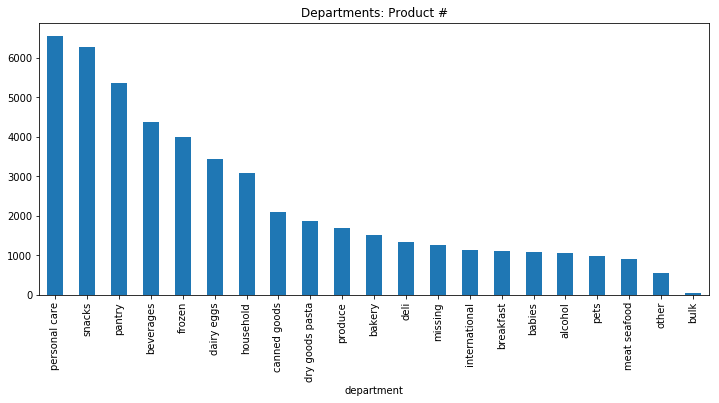

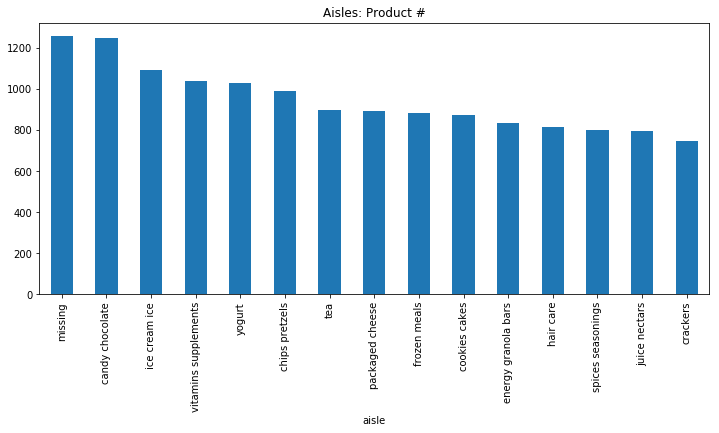

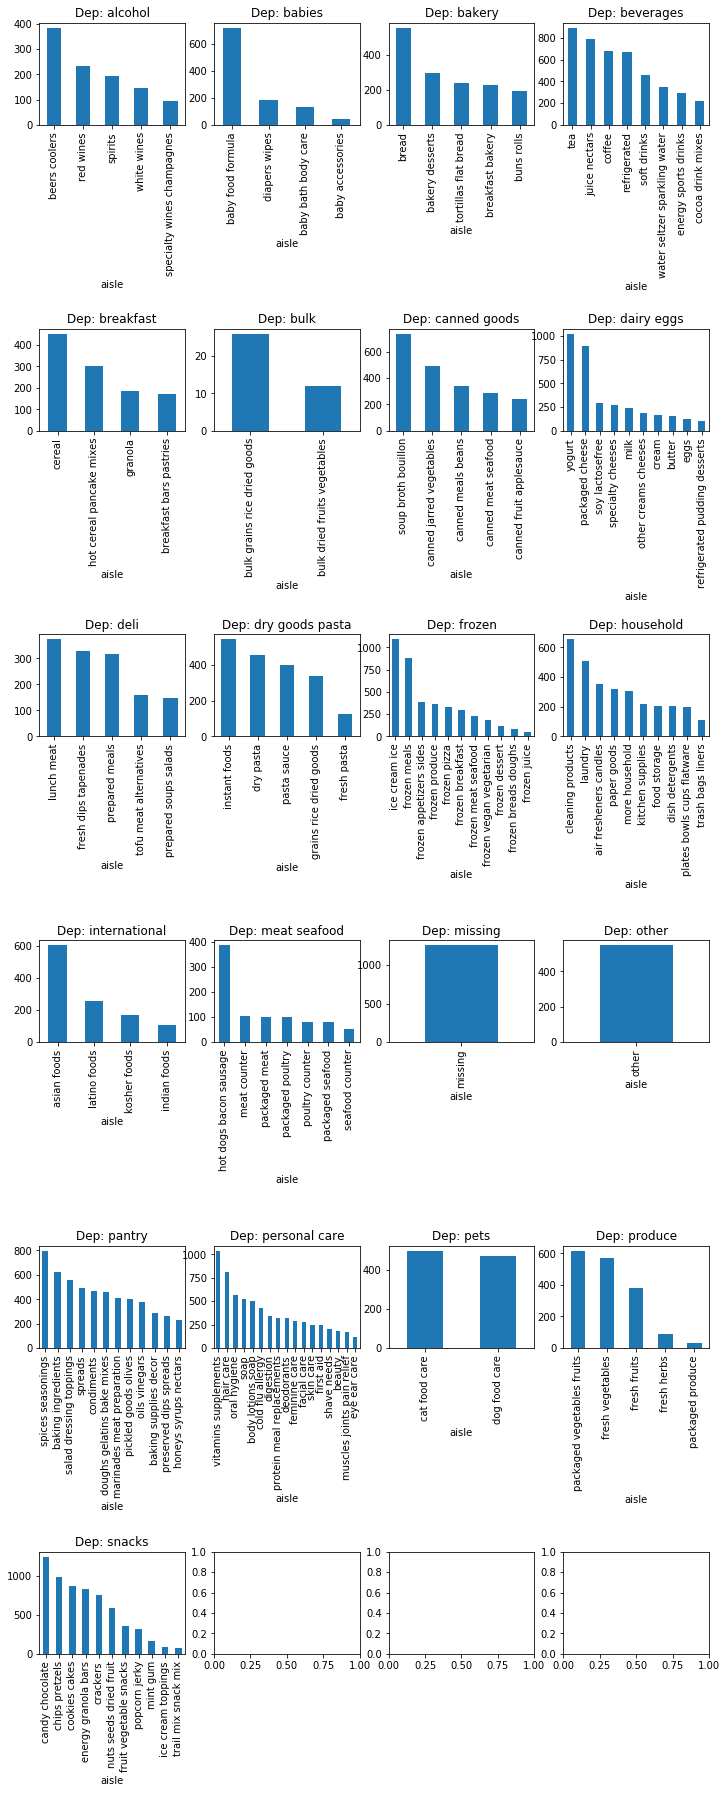

In [57]:
plt.figure(figsize=(12, 5))
goods.groupby(['department']).count()['product_id'].copy()\
.sort_values(ascending=False).plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Departments: Product #')


# basic group info (top-x aisles)
top_aisles_cnt = 15
plt.figure(figsize=(12, 5))
goods.groupby(['aisle']).count()['product_id']\
.sort_values(ascending=False)[:top_aisles_cnt].plot(kind='bar', 
                                   #figsize=(12, 5), 
                                   title='Aisles: Product #')

# plot departments volume, split by aisles
f, axarr = plt.subplots(6, 4, figsize=(12, 30))
for i,e in enumerate(departments.department.sort_values(ascending=True)):
    axarr[i//4, i%4].set_title('Dep: {}'.format(e))
    goods[goods.department==e].groupby(['aisle']).count()['product_id']\
    .sort_values(ascending=False).plot(kind='bar', ax=axarr[i//4, i%4])
f.subplots_adjust(hspace=2)

In [58]:
prior = order_products_prior[0:300000]

In [59]:
order_prior = pd.merge(prior,orders,on=['order_id','order_id'])
order_prior = order_prior.sort_values(by=['user_id','order_id'])
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
221645,23391,13198,1,1,85% Lean Ground Beef,122,12,meat seafood,meat counter,7,prior,17,0,10,28.0
221646,23391,42803,2,1,Organic Apple Slices,50,19,snacks,fruit vegetable snacks,7,prior,17,0,10,28.0
221647,23391,8277,3,1,Apple Honeycrisp Organic,24,4,produce,fresh fruits,7,prior,17,0,10,28.0
221648,23391,37602,4,1,Mexican Coffee,26,7,beverages,coffee,7,prior,17,0,10,28.0
221649,23391,40852,5,1,Lactose Free Fat Free Milk,91,16,dairy eggs,soy lactosefree,7,prior,17,0,10,28.0
